<a href="https://colab.research.google.com/github/Soyeon20220610/githubTest/blob/main/C1W4_Deep_Neural_Network_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [8]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data() 


y = 0. It's a non-cat picture.


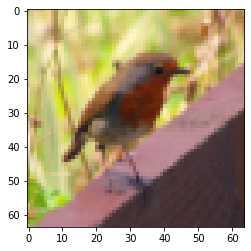

In [9]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [10]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [11]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T  #train_x_orig.shape[0] 이 뒤에 가고 나머지 숫자 곱한게 앞으로 온다.
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x=train_x_flatten/255
test_x=test_x_flatten/255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [ ]:
# sigmoid 가 0.5 이상이면 cat으로 인식 함
#input->relu->sigmoid->output

In [12]:
n_x = 12288
n_h = 7
n_y = 1
layer_dims = (n_x,n_h,n_y)
learning_rate = 0.0075

In [ ]:
# def initialize_parameters(n_x, n_h, n_y):
#     ...
#     return parameters 
# def linear_activation_forward(A_prev, W, b, activation):
#     ...
#     return A, cache
# def compute_cost(AL, Y):
#     ...
#     return cost
# def linear_activation_backward(dA, cache, activation):
#     ...
#     return dA_prev, dW, db
# def update_parameters(parameters, grads, learning_rate):
#     ...
#     return parameters

In [19]:
def two_layer_model(X,Y,layers_dims,learning_rate = 0.0075, num_iterations=3000, print_cost=False):
  np.random.seed(1)
  grads={}       # db , dW 저장하기 위함
  costs = []     #iteration에 따른 cost 저장하기 위해서
  m=X.shape[1]
  (n_x,n_h,n_y) = layers_dims

  parameters = initialize_parameters(n_x, n_h, n_y)

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  #gradient descent
  for i in range(0,num_iterations):
    #forward propagation
    A1, cache1 = linear_activation_forward(X,W1,b1,'relu')
    A2, cache2 = linear_activation_forward(A1,W2,b2,'sigmoid')
    cost = compute_cost(A2,Y)
    #backward propagation
    dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))    #initializing
    dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
    dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
    grads['dW1'] = dW1
    grads['db1'] = db1
    grads['dW2'] = dW2
    grads['db2'] = db2   
    parameters = update_parameters(parameters, grads, learning_rate)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
   # Print the cost every 100 iterations
    if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
  return parameters, costs

def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [20]:
parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2, print_cost=False)

print("Cost after first iteration: " + str(costs[0]))

two_layer_model_test(two_layer_model)

Cost after iteration 1: 0.6926114346158595
Cost after first iteration: 0.693049735659989
Cost after iteration 1: 0.6915746967050506
Cost after iteration 1: 0.6915746967050506
Cost after iteration 1: 0.6915746967050506
Cost after iteration 2: 0.6524135179683452
 All tests passed.


Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.4007977536203889
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.30527536361962637
Cost after iteration 1200: 0.27491377282130164
Cost after iteration 1300: 0.24681768210614818
Cost after iteration 1400: 0.1985073503746612
Cost after iteration 1500: 0.17448318112556635
Cost after iteration 1600: 0.1708076297809699
Cost after iteration 1700: 0.11306524562164708
Cost after iteration 1800: 0.09629426845937154
Cost after iteration 1900: 0.08342617959726871
Cost after iteration 2000: 0.07439078704319087
Cost after iteration 2100: 0.0663074813

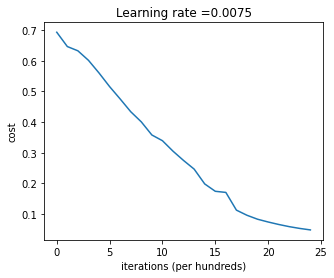

In [29]:
parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
plot_costs(costs, learning_rate)

In [30]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [31]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


이제부터 4 layer neural network 만들거임
*[LINEAR -> RELU] × (L-1) -> LINEAR -> SIGMOID*.

∇
layers_dims = [12288,20,7,5,1]
∇
input= 12288
∇
hidden layer 1 = 20
∇
hidden layer 2 = 7
∇
hiddnen layer 3 = 5
∇
output layer = 1


In [ ]:
# def initialize_parameters_deep(layers_dims):
#     ...
#     return parameters 
# def L_model_forward(X, parameters):
#     ...
#     return AL, caches
# def compute_cost(AL, Y):
#     ...
#     return cost
# def L_model_backward(AL, Y, caches):
#     ...
#     return grads
# def update_parameters(parameters, grads, learning_rate):
#     ...
#     return parameters

#모두 사용


In [23]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [24]:
def L_layer_model(X,Y,layers_dims, learning_rate = 0.0075, num_iterations=3000,print_cost=False):
  np.random.seed(1)
  costs = []

  parameters = initialize_parameters_deep(layers_dims)   # 초기화한 W,b를 가지고

  for i in range(0,num_iterations):
    AL,caches=L_model_forward(X,parameters)       # 첫번째 iteration에서의 output=AL 과 이번 iteration에서 얻은 caches=(Z1,A1,Z2,A2,,,,,) 를  저장
    cost = compute_cost(AL,Y)
    grads = L_model_backward(AL,Y,caches)
    update_parameters(parameters, grads, learning_rate)
    if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

  return parameters, costs



In [26]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))

L_layer_model_test(L_layer_model)

Cost after iteration 1: 0.6979908448967276
Cost after first iteration: 0.7717493284237686
Cost after iteration 1: 0.7070709008912569
Cost after iteration 1: 0.7070709008912569
Cost after iteration 1: 0.7070709008912569
Cost after iteration 2: 0.7063462654190897
 All tests passed.


In [32]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822914
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.5670473268366111
Cost after iteration 500: 0.5401376634547801
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.36912585249592794
Cost after iteration 900: 0.39174697434805344
Cost after iteration 1000: 0.3151869888600617
Cost after iteration 1100: 0.2726998441789385
Cost after iteration 1200: 0.23741853400268137
Cost after iteration 1300: 0.19960120532208644
Cost after iteration 1400: 0.18926300388463305
Cost after iteration 1500: 0.1611885466582775
Cost after iteration 1600: 0.14821389662363316
Cost after iteration 1700: 0.13777487812972944
Cost after iteration 1800: 0.12974017549190123
Cost after iteration 1900: 0.12122535068005212
Cost after iteration 2000: 0.1138206066863371
Cost after iteration 2100: 0.1078392

In [33]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [34]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


training sample accuracy는 layer2가 높지만,

결과적으로는 layer 4개가 layer 2개보다 더 높은 test accuracy 를 얻었다.